# Image analysis

[Link to the scikit-image homepage](https://scikit-image.org/)

<center><img src="ImageJ.png" width="80"/>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
    <img src="Fiji.png" width="104"/></center>

In biology, we deal with microscopy images. The standard software in biological image analysis is ***ImageJ*** (or ***Fiji***). ([Link](https://imagej.net/Fiji)) ImageJ was funded by NIH and it became the standard of scientific image analysis. Fiji is just ImageJ with a lot of useful bundles and packages. We do not cover ImageJ in our course, but if you plan to analyze biological data (i.e. microscopy data), using Fiji is probably the most effective way. It is extremely powerful.


For 3D visualization, a commercial software, Imaris ([link](https://imaris.oxinst.com/)), has been widely used. Most microscopy facilities have this software. Unfortunately, it is expensive (many thousand dollars). You could try a free trial version for a few days.


In Python, we can use `scikit-image`, which provides many image analysis functions. It is also a great learning tool. `scikit-image` is not as powerful as ImageJ but in many cases, our image analysis may not need complex and advanced functions. Also, if you need to combine the image analysis pipeline with other parts of your research, `scikit-image` provides enough power to get the job done.  However, if you need many complex image analyses and cutting edge functions, learning and using Fiji would be the best investment. See [this link](https://imagej.net/Introduction) for Fiji learning resources.


**Required watch**:
- An outstanding introduction to biological image analysis:
    1. [Digital images](https://www.ibiology.org/talks/digital-images/)
    2. [Image analysis](https://www.ibiology.org/talks/image-analysis/)
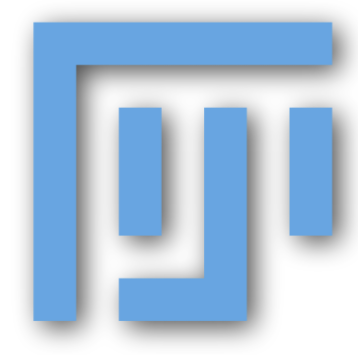
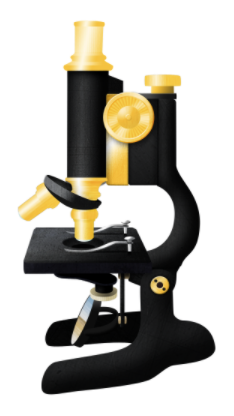

---

(Optional) There are an enormous amount of basic image analysis tutorials. See, for example:
- https://towardsdatascience.com/image-data-analysis-using-python-edddfdf128f4
- https://matplotlib.org/stable/tutorials/introductory/images.html
- https://scipy-lectures.org/advanced/image_processing/index.html
- https://notebooks.gesis.org/binder/jupyter/user/elegant-scipy-notebooks-qb2xz4qu/notebooks/notebooks/ch3.ipynb

---

<sub>This ipynb uses examples by Justin Bois in his bootcamp: [Link](http://justinbois.github.io/bootcamp/2019_epfl/)</sub>

---

# **scikit-image**

## Image analysis of *Bacillus subtilis*

Our goal is to calculate the total area of bacteria in the image.

In [ ]:
# Restart the kernel after running the following code
!pip install pandas --upgrade
!pip install scikit-image --upgrade
!pip install pillow --upgrade

In [ ]:
# scikit-image has many sub-packages and it can be a bit cumbersome to load each of them.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage import io, filters

# Load the phase contrast image.
im_phase = io.imread('data/bsub_50x_phase.tif')

# Take a look
im_phase  # This is a simple 2-dimensional Numpy array with integer type.

In [ ]:
io.imshow(im_phase)

In [ ]:
# We need to know the physical distance between pixels
ip_distance = 0.1252 # unit: micrometer

In [ ]:
# Using um as a correct unit for each axis
# Interpolation is disabled to represent accurate image
plt.figure()
plt.xlabel('um')
plt.ylabel('um')
io.imshow(im_phase, interpolation='none', 
          extent=[0, ip_distance*im_phase.shape[1], ip_distance*im_phase.shape[0],0])

In [ ]:
# Colormaps:Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, 
#           BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, 
#           Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, 
#           PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, 
#           PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r,
#           Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, 
#           RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, 
#           Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, 
#           YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, 
#           autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, 
#           cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r,
#           cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray,
#           gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, 
#           gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, 
#           gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, 
#           hot, hot_r, hsv, hsv_r, inferno, inferno_r, jet, jet_r, magma, magma_r, 
#           nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, 
#           plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, seismic, seismic_r, 
#           spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, 
#           tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, twilight, twilight_r,
#           twilight_shifted, twilight_shifted_r, viridis, viridis_r, winter, winter_r
# Default: viridis

plt.figure()
plt.xlabel('um')
plt.ylabel('um')
io.imshow(im_phase, cmap='cividis_r', interpolation='none', 
          extent=[0, ip_distance*im_phase.shape[1], ip_distance*im_phase.shape[0],0])



# Segmentation

## by Thresholding

In [ ]:
# Let's pick bacteria pixels. First, we need to find a threshold.

data=pd.DataFrame({'intensity': im_phase.flatten()})
data.plot(kind='hist', bins=range(im_phase.min(), im_phase.max(), 2)) 

# You can see a small bump below 300 at around 200.

In [ ]:
data.plot(kind='hist', logy=True, bins=range(im_phase.min(), im_phase.max(), 2)) 

In [ ]:
thresh_phase = 300

# Generate thresholded image
im_phase_bw = im_phase < thresh_phase

plt.figure()
plt.xlabel('um')
plt.ylabel('um')
im = im_phase_bw
io.imshow(im, cmap='gray', interpolation='none', 
          extent=[0, ip_distance*im.shape[1], ip_distance*im.shape[0],0])


In [ ]:
# Overlaying

# Build RGB image by stacking grayscale images
# Check out by yourslef what np.dstack does.
im_phase_rgb = np.dstack(3 * [im_phase / im_phase.max()])

# Saturate green channel wherever there are white pixels in thresh image
im_phase_rgb[im_phase_bw, 1] = 1.0

plt.figure()
plt.xlabel('um')
plt.ylabel('um')
im = im_phase_rgb
io.imshow(im, cmap='gray', interpolation='none', 
          extent=[0, ip_distance*im.shape[1], ip_distance*im.shape[0],0])


# Note that we caught many speckles that are not bacteria.

In [ ]:
# One way to improve is to use fluorescent proteins.
# The image below was collected with CFP (cyan) expressed in the bacteria.
# Often, the CFP expressing bacteria are much brighter than the background.

im_cfp = io.imread('data/bsub_50x_cfp.tif')

plt.figure()
plt.xlabel('um')
plt.ylabel('um')
io.imshow(im_cfp, interpolation='none', 
          extent=[0, ip_distance*im_phase.shape[1], ip_distance*im_phase.shape[0],0])

In [ ]:
# To be more perfect, we want to reduce the background noise.
# (E.g., there could be broken pixels in the camera, etc)
# Using a median filter is often a good first pass.
# Its usage is shown below.
from skimage import morphology

# We need to define the filter shape, using morphology module. Here we use 3x3 square shape.
selem = morphology.square(3)

# Perform the median filter
im_cfp_filt = filters.median(im_cfp, selem)

plt.figure()
plt.xlabel('um')
plt.ylabel('um')
io.imshow(im_cfp_filt, interpolation='none', 
          extent=[0, ip_distance*im_phase.shape[1], ip_distance*im_phase.shape[0],0])

# It should look very similar

In [ ]:
# We repeat the density plot and pick a threshold.  But, in fact, it is not easy to
# see where bright pixels are, because there are too many dark pixels in the image.

data=pd.DataFrame({'intensity': im_cfp_filt.flatten()})
data.plot(kind='hist', bins=range(im_cfp_filt.min(), im_cfp_filt.max(), 2)) 

In [ ]:
# It sometimes helps to use a log-scale on y-axis. Now we can see that, at around
# 145, bright pixels begins to appear.

data.plot(kind='hist', logy=True, bins=range(im_cfp_filt.min(), im_cfp_filt.max(), 2)) 

In [ ]:
thresh_cfp = 145

# Generate thresholded image
im_cfp_bw = im_cfp_filt > thresh_cfp

plt.figure()
plt.xlabel('um')
plt.ylabel('um')
im = im_cfp_bw
io.imshow(im, cmap='gray', interpolation='none', 
          extent=[0, ip_distance*im.shape[1], ip_distance*im.shape[0],0])

In [ ]:
# Build RGB image by stacking grayscale images
# Check out by yourslef what np.dstack does.
im_phase_rgb = np.dstack(3 * [im_phase / im_phase.max()])

# Saturate green channel wherever there are white pixels in thresh image
im_phase_rgb[im_cfp_bw, 1] = 1.0

plt.figure()
plt.xlabel('um')
plt.ylabel('um')
im = im_phase_rgb
io.imshow(im, cmap='gray', interpolation='none', 
          extent=[0, ip_distance*im.shape[1], ip_distance*im.shape[0],0])

---

### Otsu's automatic thresholding method

There is an automatic algorithm to detect the threshold.

In [ ]:
# Compute Otsu thresholds for phase and cfp
thresh_phase_otsu = filters.threshold_otsu(im_phase)
thresh_cfp_otsu = filters.threshold_otsu(im_cfp_filt)

# Compare results to eyeballing it
print('Phase by eye: ', thresh_phase,      '   CFP by eye: ', thresh_cfp)
print('Phase by Otsu:', thresh_phase_otsu, '   CFP by Otsu:', thresh_cfp_otsu)

You can see that Otsu's method for phase image is too off. It is because Otsu's method relies on an assumption that the image pixel values are bimodally distributed. But, the phase image has a very long tail to the high end, which distorts the algorithm.  So, don't rely on the automatic algorithm and check its validity in your data.

---

Final step is to calculate the area occupied by bacteria.

In [ ]:
# Compute bacterial area
bacterial_area_pix = (im_cfp_filt > thresh_cfp_otsu).sum()
bacterial_area_micron = bacterial_area_pix * ip_distance**2

# Print out the result
print('bacterial area =', bacterial_area_pix, 'pixels')
print('bacterial area =', bacterial_area_micron, 'square microns')